***DATASET DESCRIPTION***

*The dataset for this competition (both train and test) was generated from a deep learning model trained on the Wine Quality dataset. Feature distributions are close to, but not exactly the same, as the original.*

***ATTRIBUTE DESCRIPTION***

**fixed acidity** : *Primary fixed acids found in wine are tartaric, succinic, citric, and malic.*

**volatile acidity** : *Gaseous acids present in wine.*

**citric acid** : *It is weak organic acid, found in citrus fruits naturally.*

**residual sugar** : *Amount of sugar left after fermentation.*

**chlorides** : *Amount of salt present in wine.*

**free sulfur dioxide** : *So2 is used for prevention of wine by oxidation and microbial spoilage.*

**total sulfur dioxide** : *Total So2 in wine*

**density** : *Describes the density of the wine.*

**pH** : *pH is used for checking acidity*

**sulphates** : *Added sulfites preserve freshness and protect wine from oxidation, and bacteria.*

**alcohol** : *Percent of alcohol present in wine.*

***Imports***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***EDA - EXPLORATORY DATA ANALYSIS***

***Data Collection***

In [2]:
# Reading the input file
df_train = pd.read_csv('/kaggle/input/playground-series-s3e5/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e5/test.csv')

***Analyzing the Data***

In [3]:
df_train.head()   # displays the first five rows of the dataframe

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [4]:
df_test.head()   # displays the first five rows of the dataframe

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,2057,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,2058,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,2059,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
4,2060,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8


In [5]:
df_train.shape    # returns a tuple of array dimension that specifies the number of rows and columns

(2056, 13)

In [6]:
df_test.shape    # returns a tuple of array dimension that specifies the number of rows and columns

(1372, 12)

In [7]:
df_train.info()   # prints the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed acidity         2056 non-null   float64
 2   volatile acidity      2056 non-null   float64
 3   citric acid           2056 non-null   float64
 4   residual sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free sulfur dioxide   2056 non-null   float64
 7   total sulfur dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


In [8]:
df_test.info()   # prints the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1372 non-null   int64  
 1   fixed acidity         1372 non-null   float64
 2   volatile acidity      1372 non-null   float64
 3   citric acid           1372 non-null   float64
 4   residual sugar        1372 non-null   float64
 5   chlorides             1372 non-null   float64
 6   free sulfur dioxide   1372 non-null   float64
 7   total sulfur dioxide  1372 non-null   float64
 8   density               1372 non-null   float64
 9   pH                    1372 non-null   float64
 10  sulphates             1372 non-null   float64
 11  alcohol               1372 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 128.8 KB


***Check for missing values and handle them.***

In [9]:
df_train.isnull().sum()

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df_test.isna().sum()

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

***Check for duplicate values***

In [11]:
df_train.duplicated().any()

False

In [12]:
df_test.duplicated().any()

False

***Check for outliers. If present try to handle them (Train Data)***

In [13]:
df_train.skew()

Id                      0.000000
fixed acidity           0.959832
volatile acidity        0.668343
citric acid             0.246571
residual sugar          3.756802
chlorides               5.262627
free sulfur dioxide     0.681219
total sulfur dioxide    1.267906
density                 0.202606
pH                      0.216976
sulphates               1.802854
alcohol                 0.786872
quality                 0.266307
dtype: float64

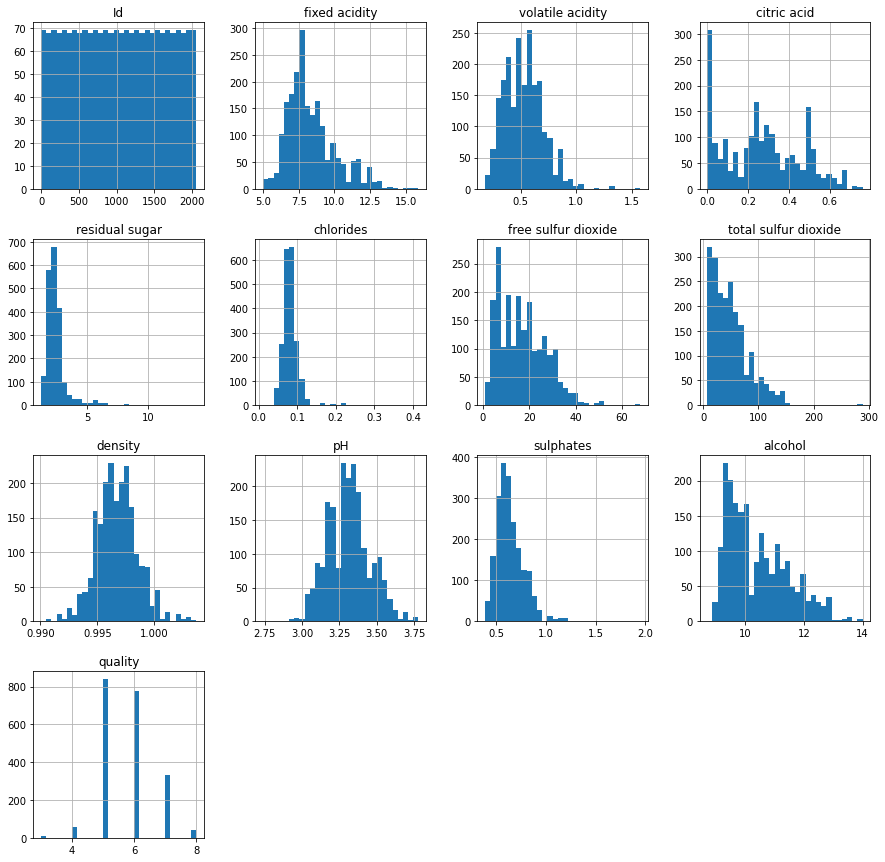

In [14]:
df_train.hist(bins=30, figsize=(15,15))
plt.show()

*Columns such as 'residual sugar', 'chlorides', 'total sulfur dioxide' and 'sulphates' are* ***Highly Skewed*** 

*Columns such as 'fixed acidity', 'volatile acidity', 'free sulfur dioxide' and 'alcohol are* ***Moderately Skewed***

***Handling Skewness***

In [15]:
# Interquantile Range
quantile1=df_train["residual sugar"].quantile(0.25)
quantile2=df_train["residual sugar"].quantile(0.75)

In [16]:
df_train["residual sugar"]=np.where(df_train["residual sugar"]<quantile1,quantile1,df_train["residual sugar"])
df_train["residual sugar"]=np.where(df_train["residual sugar"]>quantile2,quantile2,df_train["residual sugar"])

In [17]:
a = round(df_train['residual sugar'].skew(),6)
print(a)

0.128837


In [18]:
# Log Transformation
df_train['chlorides'] = np.log(df_train['chlorides'])
b = round(df_train['chlorides'].skew(),6)
print(b)

0.293514


In [19]:
# Interquantile Range
quantile1=df_train["total sulfur dioxide"].quantile(0.25)
quantile2=df_train["total sulfur dioxide"].quantile(0.75)

In [20]:
df_train["total sulfur dioxide"]=np.where(df_train["total sulfur dioxide"]<quantile1,quantile1,df_train["total sulfur dioxide"])
df_train["total sulfur dioxide"]=np.where(df_train["total sulfur dioxide"]>quantile2,quantile2,df_train["total sulfur dioxide"])

In [21]:
c = round(df_train['total sulfur dioxide'].skew(),6)
print(c)

0.014584


In [22]:
# Log Transformation
df_train['sulphates'] = np.log(df_train['sulphates'])
d = round(df_train['sulphates'].skew(),6)
print(d)

0.657493


In [23]:
# Log Transformation
df_train['fixed acidity'] = np.log(df_train['fixed acidity'])
e = round(df_train['fixed acidity'].skew(),6)
print(e)

0.448891


In [24]:
# Interquantile Range
quantile1=df_train["alcohol"].quantile(0.25)
quantile2=df_train["alcohol"].quantile(0.75)

In [25]:
df_train["alcohol"]=np.where(df_train["alcohol"]<quantile1,quantile1,df_train["alcohol"])
df_train["alcohol"]=np.where(df_train["alcohol"]>quantile2,quantile2,df_train["alcohol"])

In [26]:
f = round(df_train['alcohol'].skew(),6)
print(f)

0.097996


In [27]:
# SquareRoot Transformation
df_train['volatile acidity'] = np.sqrt(df_train['volatile acidity'])
g = round(df_train['volatile acidity'].skew(),6)
print(g)

0.159986


In [28]:
# Log Transformation
df_train['free sulfur dioxide'] = np.log(df_train['free sulfur dioxide'])
h = round(df_train['free sulfur dioxide'].skew(),6)
print(h)

-0.398163


In [29]:
df_train.skew()

Id                      0.000000
fixed acidity           0.448891
volatile acidity        0.159986
citric acid             0.246571
residual sugar          0.128837
chlorides               0.293514
free sulfur dioxide    -0.398163
total sulfur dioxide    0.014584
density                 0.202606
pH                      0.216976
sulphates               0.657493
alcohol                 0.097996
quality                 0.266307
dtype: float64

***Check for outliers. If present try to handle them (Test Data)***

In [30]:
df_test.skew()

Id                      0.000000
fixed acidity           0.998275
volatile acidity        0.751330
citric acid             0.212425
residual sugar          3.186226
chlorides               6.452885
free sulfur dioxide     0.713118
total sulfur dioxide    1.087170
density                 0.106033
pH                      0.269916
sulphates               1.633799
alcohol                 0.721949
dtype: float64

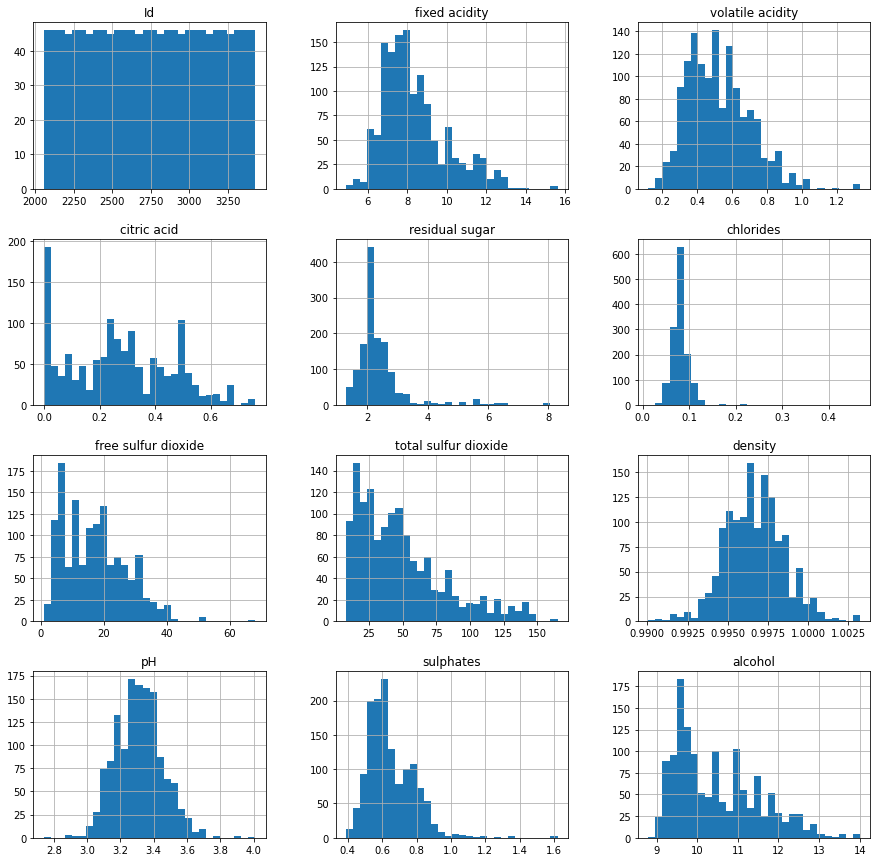

In [31]:
df_test.hist(bins=30, figsize=(15,15))
plt.show()

*Columns such as 'residual sugar', 'chlorides', 'total sulfur dioxide' and 'sulphates' are* ***Highly Skewed*** 

*Columns such as 'fixed acidity', 'volatile acidity', 'free sulfur dioxide' and 'alcohol are* ***Moderately Skewed***

In [32]:
# Interquantile Range
quantile1=df_test["residual sugar"].quantile(0.25)
quantile2=df_test["residual sugar"].quantile(0.75)

In [33]:
df_test["residual sugar"]=np.where(df_test["residual sugar"]<quantile1,quantile1,df_test["residual sugar"])
df_test["residual sugar"]=np.where(df_test["residual sugar"]>quantile2,quantile2,df_test["residual sugar"])

In [34]:
a = round(df_test['residual sugar'].skew(),6)
print(a)

0.188975


In [35]:
# Log Transformation
df_test['chlorides'] = np.log(df_test['chlorides'])
b = round(df_test['chlorides'].skew(),6)
print(b)

0.510705


In [36]:
# Interquantile Range
quantile1=df_test["total sulfur dioxide"].quantile(0.25)
quantile2=df_test["total sulfur dioxide"].quantile(0.75)

In [37]:
df_test["total sulfur dioxide"]=np.where(df_test["total sulfur dioxide"]<quantile1,quantile1,df_test["total sulfur dioxide"])
df_test["total sulfur dioxide"]=np.where(df_test["total sulfur dioxide"]>quantile2,quantile2,df_test["total sulfur dioxide"])

In [38]:
c = round(df_test['total sulfur dioxide'].skew(),6)
print(c)

0.132918


In [39]:
# Log Transformation
df_test['sulphates'] = np.log(df_test['sulphates'])
d = round(df_test['sulphates'].skew(),6)
print(d)

0.583644


In [40]:
# Log Transformation
df_test['fixed acidity'] = np.log(df_test['fixed acidity'])
e = round(df_test['fixed acidity'].skew(),6)
print(e)

0.525269


In [41]:
# SquareRoot Transformation
df_test['volatile acidity'] = np.sqrt(df_test['volatile acidity'])
f = round(df_test['volatile acidity'].skew(),6)
print(f)

0.273401


In [42]:
# Interquantile Range
quantile1=df_test["alcohol"].quantile(0.25)
quantile2=df_test["alcohol"].quantile(0.75)

In [43]:
df_test["alcohol"]=np.where(df_test["alcohol"]<quantile1,quantile1,df_test["alcohol"])
df_test["alcohol"]=np.where(df_test["alcohol"]>quantile2,quantile2,df_test["alcohol"])

In [44]:
g = round(df_test['alcohol'].skew(),6)
print(g)

0.153071


In [45]:
# SquareRoot Transformation
df_test['free sulfur dioxide'] = np.sqrt(df_test['free sulfur dioxide'])
h = round(df_test['free sulfur dioxide'].skew(),6)
print(h)

0.114016


In [46]:
df_test.skew()

Id                      0.000000
fixed acidity           0.525269
volatile acidity        0.273401
citric acid             0.212425
residual sugar          0.188975
chlorides               0.510705
free sulfur dioxide     0.114016
total sulfur dioxide    0.132918
density                 0.106033
pH                      0.269916
sulphates               0.583644
alcohol                 0.153071
dtype: float64

***Correlation (Train)***

In [47]:
correlation = df_train.corr()
correlation

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,1.000000,-0.021168,-0.023272,0.010262,-0.016102,-0.004012,0.024568,-0.000944,-0.022799,0.016261,0.012040,0.000517,0.025684
fixed acidity,-0.021168,1.000000,-0.329939,0.698346,0.298606,0.222004,-0.241479,-0.156772,0.611695,-0.696062,0.143833,-0.038549,0.065921
volatile acidity,-0.023272,-0.329939,1.000000,-0.594184,-0.075364,0.060483,0.082005,0.129389,-0.072184,0.246769,-0.361836,-0.222926,-0.226043
citric acid,0.010262,0.698346,-0.594184,1.000000,0.191672,0.155228,-0.208988,-0.134404,0.376759,-0.558444,0.276540,0.072221,0.141797
residual sugar,-0.016102,0.298606,-0.075364,0.191672,1.000000,0.157410,-0.051490,0.007783,0.346806,-0.177625,0.024141,0.023868,0.031020
chlorides,-0.004012,0.222004,0.060483,0.155228,0.157410,1.000000,-0.027467,0.043546,0.319711,-0.168089,0.012908,-0.204425,-0.057792
free sulfur dioxide,0.024568,-0.241479,0.082005,-0.208988,-0.051490,-0.027467,1.000000,0.769911,-0.074378,0.146622,-0.046795,-0.131432,-0.061303
total sulfur dioxide,-0.000944,-0.156772,0.129389,-0.134404,0.007783,0.043546,0.769911,1.000000,0.069434,0.054240,-0.136596,-0.312575,-0.199719
density,-0.022799,0.611695,-0.072184,0.376759,0.346806,0.319711,-0.074378,0.069434,1.000000,-0.388449,0.000122,-0.324507,-0.153198
pH,0.016261,-0.696062,0.246769,-0.558444,-0.177625,-0.168089,0.146622,0.054240,-0.388449,1.000000,-0.038829,0.127625,0.016378


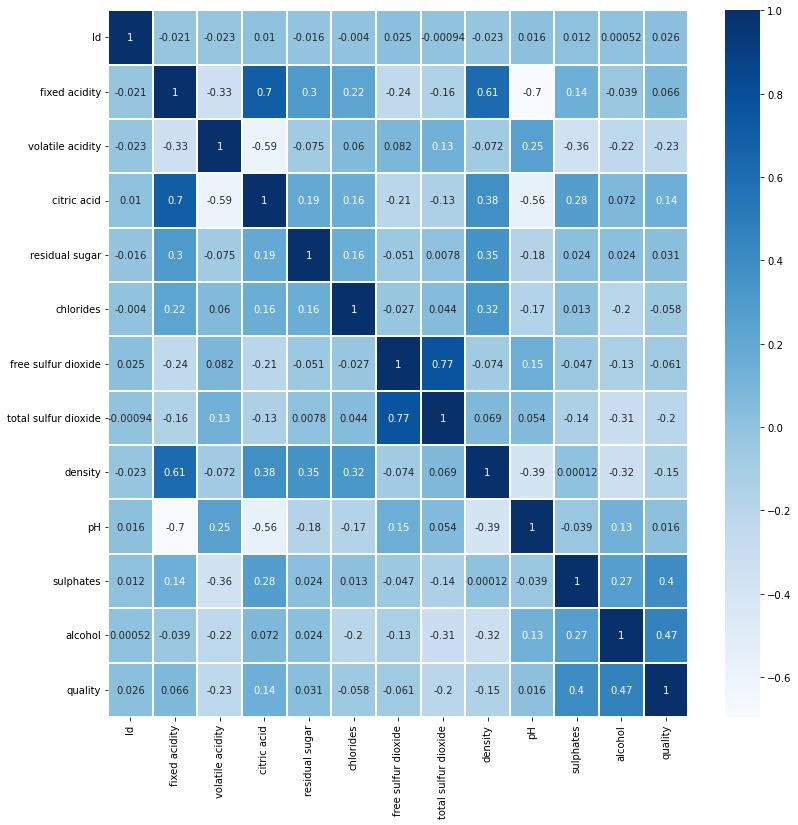

In [48]:
plt.figure(figsize=(13,13))
sns.heatmap(correlation,annot=True,cmap="Blues",linewidths=0.2)
plt.show()

***Correlation (Test)***

In [49]:
correlation = df_test.corr()
correlation

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Id,1.000000,0.012975,0.057115,-0.016568,0.025718,0.008605,0.017491,-0.003178,-0.004972,0.034436,-0.014864,0.003299
fixed acidity,0.012975,1.000000,-0.341535,0.700071,0.289323,0.236956,-0.233513,-0.142754,0.590213,-0.644967,0.158820,-0.033634
volatile acidity,0.057115,-0.341535,1.000000,-0.615574,-0.094034,0.082086,0.086711,0.116494,-0.079071,0.291053,-0.366331,-0.256683
citric acid,-0.016568,0.700071,-0.615574,1.000000,0.218042,0.161146,-0.196322,-0.125881,0.383835,-0.539803,0.317022,0.111193
residual sugar,0.025718,0.289323,-0.094034,0.218042,1.000000,0.144853,-0.041438,-0.016274,0.279365,-0.150572,0.053518,0.065051
chlorides,0.008605,0.236956,0.082086,0.161146,0.144853,1.000000,-0.019748,0.047327,0.373062,-0.139924,0.033419,-0.215233
free sulfur dioxide,0.017491,-0.233513,0.086711,-0.196322,-0.041438,-0.019748,1.000000,0.752288,-0.058893,0.123525,-0.106279,-0.156230
total sulfur dioxide,-0.003178,-0.142754,0.116494,-0.125881,-0.016274,0.047327,0.752288,1.000000,0.107375,0.019064,-0.172363,-0.344374
density,-0.004972,0.590213,-0.079071,0.383835,0.279365,0.373062,-0.058893,0.107375,1.000000,-0.351868,-0.000136,-0.362206
pH,0.034436,-0.644967,0.291053,-0.539803,-0.150572,-0.139924,0.123525,0.019064,-0.351868,1.000000,-0.070222,0.090427


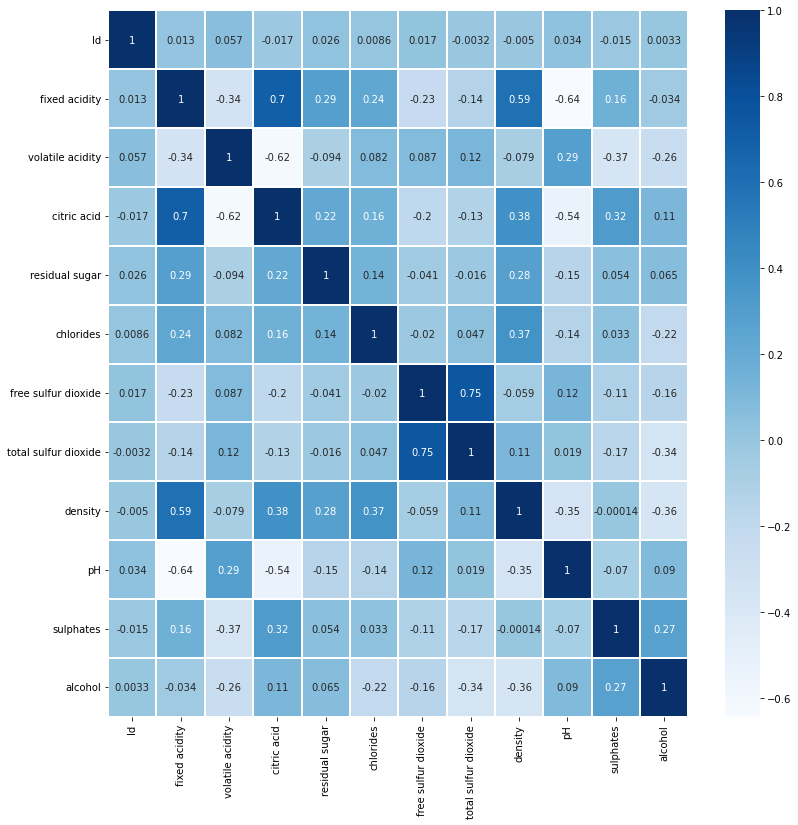

In [50]:
plt.figure(figsize=(13,13))
sns.heatmap(correlation,annot=True,cmap="Blues",linewidths=0.2)
plt.show()

***Splitting X_train, y_train***

In [51]:
X_train = df_train.iloc[:,0:12]
y_train = df_train.quality

In [52]:
X_train.head(2)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,2.079442,0.707107,0.39,2.2,-2.617296,3.401197,39.0,0.99572,3.33,-0.261365,11.0
1,1,2.230014,0.547723,0.73,2.3,-2.385967,3.401197,65.0,0.99854,3.32,-0.400478,11.0


In [53]:
y_train.head(2)

0    6
1    6
Name: quality, dtype: int64

In [54]:
X_test = df_test.iloc[:,:]

In [55]:
X_test.head(2)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,1.974081,0.714143,0.01,2.0,-2.563950,5.567764,54.0,0.99748,3.39,-0.527633,9.8
1,2057,1.974081,0.868907,0.15,2.0,-2.282782,3.741657,35.0,0.99586,3.33,-0.385662,10.0


***MODELLING***

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
reg1 = GradientBoostingRegressor(random_state=1)

from sklearn.ensemble import RandomForestRegressor
reg2 = RandomForestRegressor(random_state=1)

from sklearn.linear_model import LinearRegression
reg3 = LinearRegression()

from sklearn.ensemble import VotingRegressor
regressor = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lir', reg3)])

regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)
prediction

array([5.57149025, 6.21414134, 5.55404906, ..., 5.39210493, 5.48558315,
       6.02684143])

In [57]:
submission = pd.DataFrame({'Id': df_test.Id, 'quality': prediction})
submission.head()

,Id,quality
0,2056,5.571490
1,2057,6.214141
2,2058,5.554049
3,2059,6.456950
4,2060,5.463296


In [58]:
submission.to_csv('submission.csv', index=False)